![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

Utilize your unsupervised learning skills to clusters in the penguins dataset!

Import, investigate and pre-process the "penguins.csv" dataset.
Perform a cluster analysis based on a reasonable number of clusters and collect the average values for the clusters. The output should be a DataFrame named stat_penguins with one row per cluster that shows the mean of the original variables (or columns in "penguins.csv") by cluster. stat_penguins should not include any non-numeric columns.

The different steps:
1. Perform preprocessing steps on the dataset to create dummy variables

2. Detect the optimal number of clusters for k-means clustering

3. Run the k-means clustering algorithm

4. Create a final statistical DataFrame for each cluster.

In [146]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [147]:
# check data
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [148]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


### Step 1. Perform preprocessing steps on the dataset to create dummy variables

In [149]:
sex_dummies = pd.get_dummies(penguins_df['sex'], drop_first=True)
penguins_df_2 = pd.concat([penguins_df, sex_dummies], axis=1).drop('sex', axis=1)

#### Step 1b. Perform scaling on numeric columns

In [150]:
# scale the numeric columns
list_scaling = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g',]
scaler = StandardScaler()
penguins_df_2[list_scaling] = scaler.fit_transform(penguins_df_2[list_scaling])
penguins_df_2.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,MALE
count,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02,332.000000
mean,-4.708416e-16,1.284113e-16,7.276642e-16,4.280378e-17,0.503012
std,1.001509e+00,1.001509e+00,1.001509e+00,1.001509e+00,0.500746
min,-2.189667e+00,-2.070694e+00,-2.067519e+00,-1.871059e+00,0.000000
25%,-8.304338e-01,-7.934376e-01,-7.831643e-01,-8.153502e-01,0.000000
50%,1.247034e-01,7.509650e-02,-2.836929e-01,-2.253950e-01,1.000000
75%,8.456482e-01,7.903599e-01,8.579560e-01,7.138756e-01,1.000000
max,2.861539e+00,2.220887e+00,2.142311e+00,2.600180e+00,1.000000


### Step 2. Detect the optimal number of clusters for k-means clustering
Use the Elbox method to detect the optimal number of clusters
The Elbow method examines the relationship between the number of clusters and the within-cluster sum of squares (WCSS/inertia), a measure of the variance within each cluster.
I want to determine the optimal number of clusters where it's both not overfitting the data with too many clusters, and also not underfitting with too few. 

For the elbow method: 
- I create a for loop for different numbers of clusters (1-10), stored as a range in K. 
- Inside the loop, the KMeans algorithm is trained on the data using each value of K. 
- Store the model and the inertia scores for each value of K

In [151]:
K = range(1, 10)
fits = []
inertias = []
intertias_dict = {}

for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0).fit(penguins_df_2)
    
    # append the model to fits
    fits.append(model)
    
    # Append the inertia to list inertias
    inertias.append(model.inertia_)
    intertias_dict[k] = model.inertia_

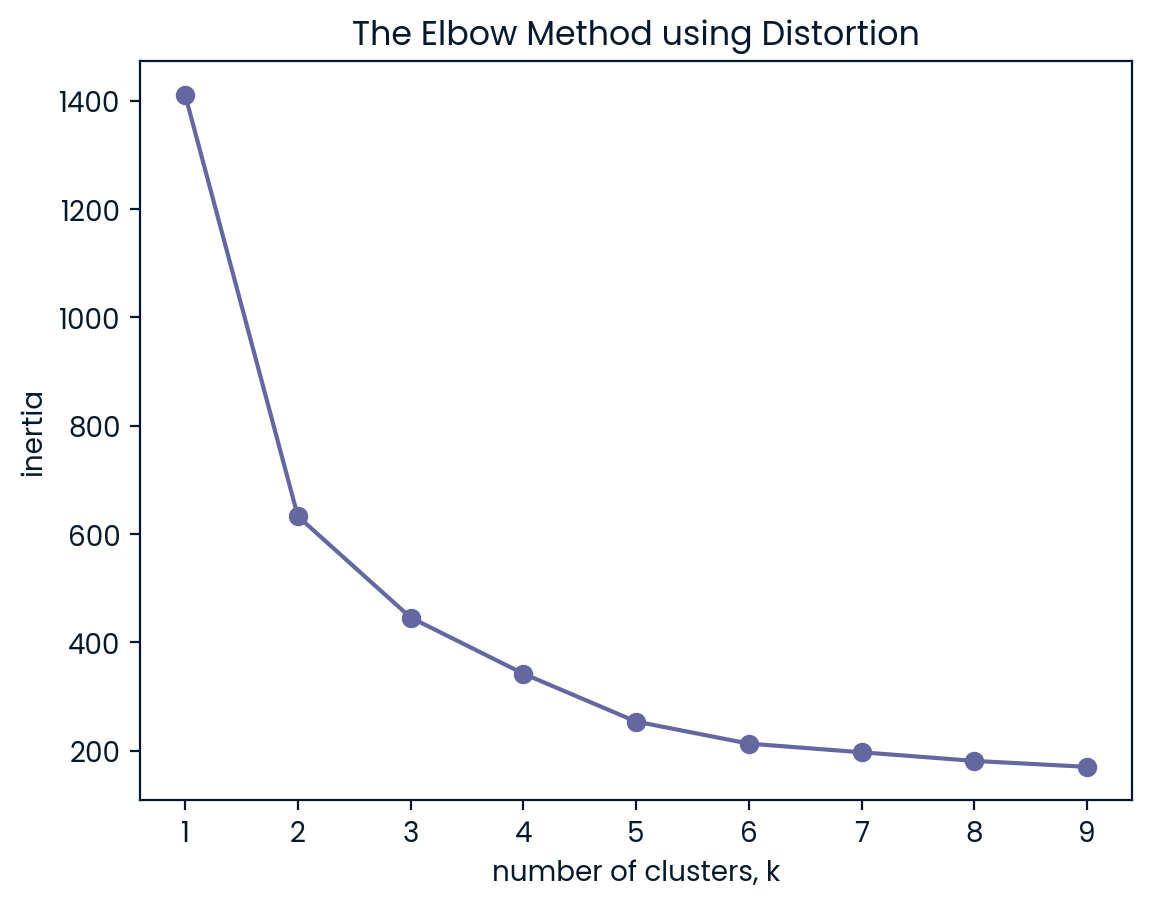

In [152]:
plt.plot(K, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(K)
plt.title('The Elbow Method using Distortion')
plt.show()

In [153]:
print('inertia values:')
for key, val in intertias_dict.items():
    print(f'{key} : {val}')

inertia values:
1 : 1410.9969879518067
2 : 632.878768397014
3 : 446.03107703169854
4 : 342.4238666599881
5 : 253.95819355644386
6 : 213.22744278232688
7 : 197.26449732254974
8 : 181.3185077057824
9 : 170.35671033652017


It's a bit of a guess which cluster is the best. After 2 clusters the WCSS 
So it could be meaningful to look at the data in the clusters. However, the data is high-dimensional, so not possible to visualize all features at the same time


In [154]:
penguins_df_2.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'MALE'],
      dtype='object')

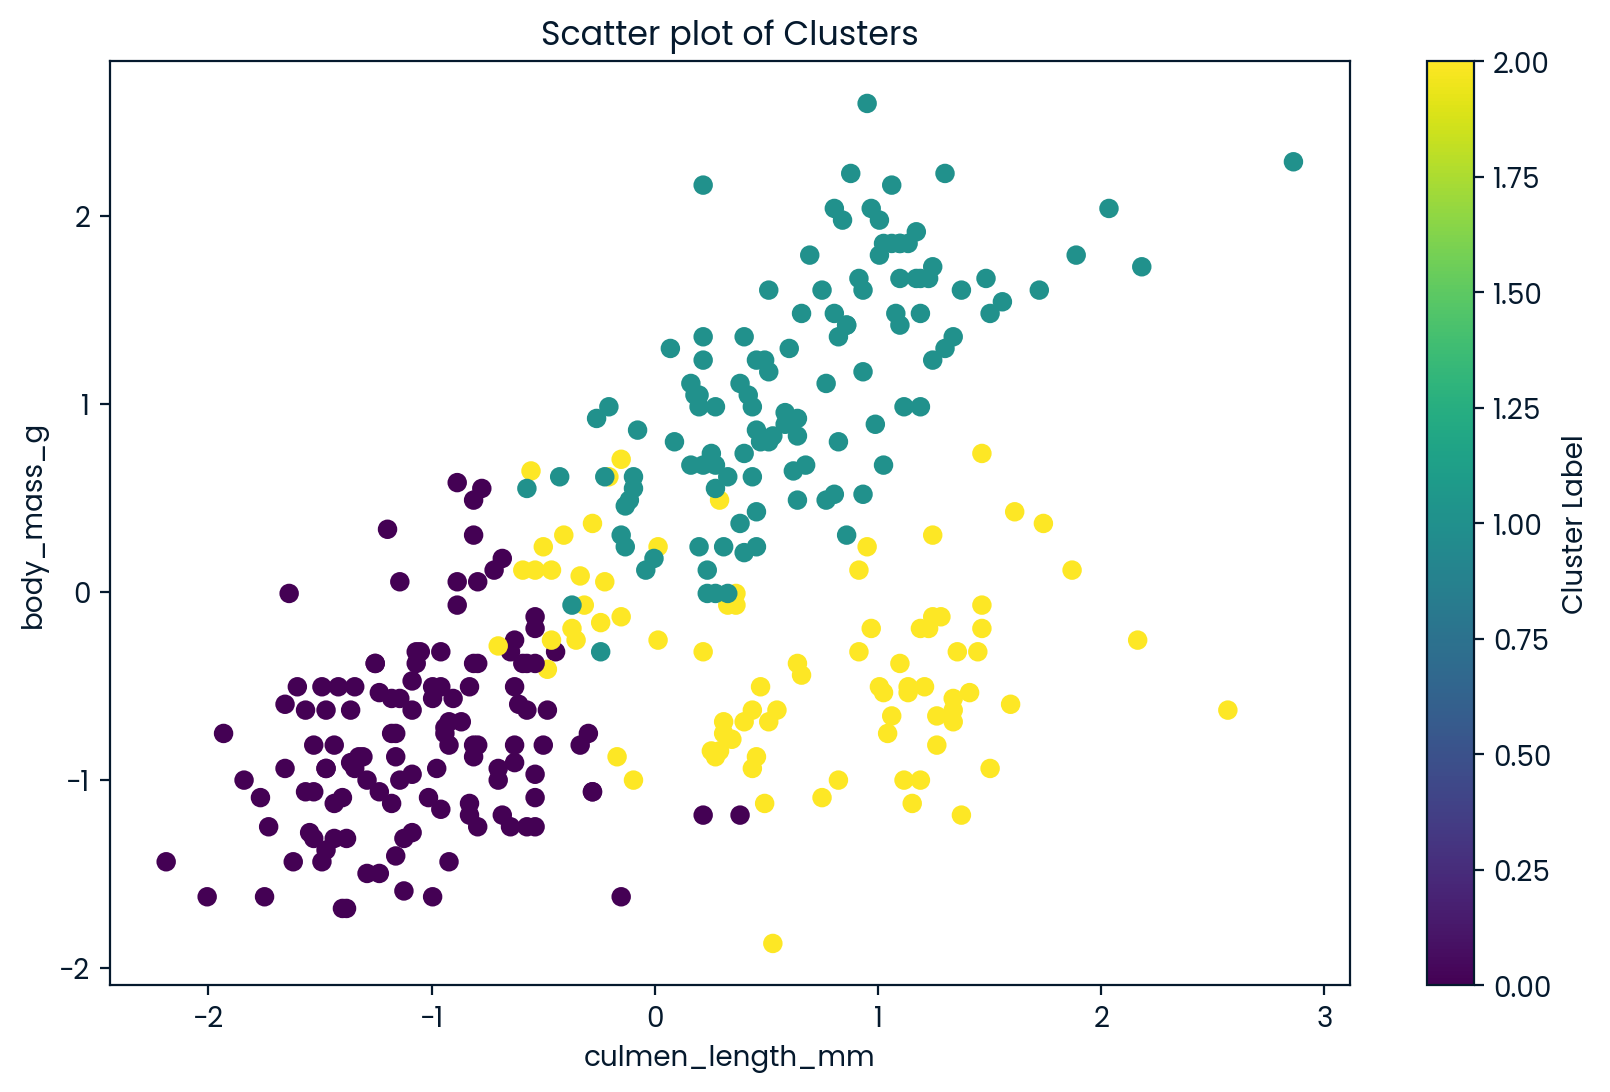

In [155]:
dim_a = 'culmen_length_mm'
dim_b = 'body_mass_g'

plt.figure(figsize=(10, 6))
scatter = plt.scatter(penguins_df_2[dim_a], penguins_df_2[dim_b], c=fits[2].labels_)
plt.xlabel(dim_a)
plt.ylabel(dim_b)
plt.title('Scatter plot of Clusters')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

#### Step 3. Run the k-means clustering algorithm
But based on the introduction text, there are 3 types of penguins so let's stick with 3 clusters.


In [156]:
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, random_state = 0).fit(penguins_df_2)
penguins_df_2['cluster'] = kmeans.predict(penguins_df_2)

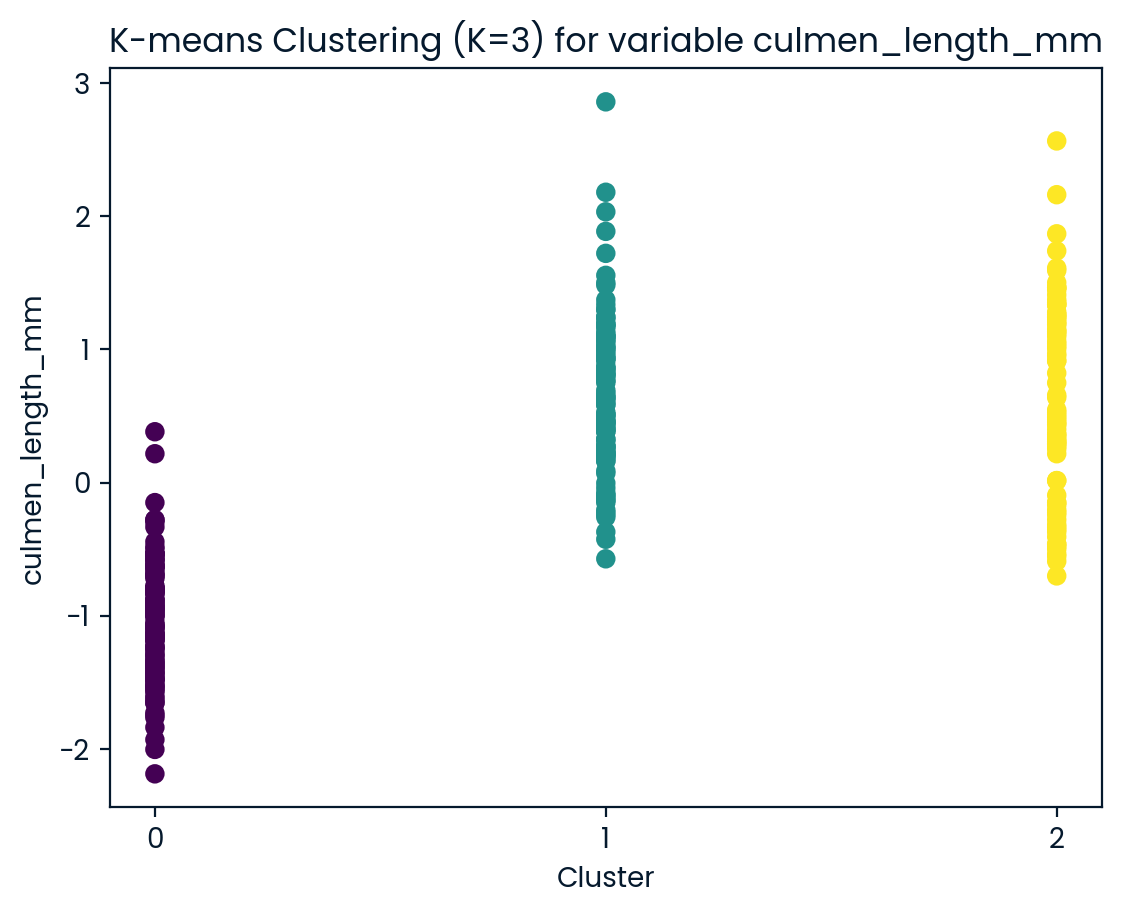

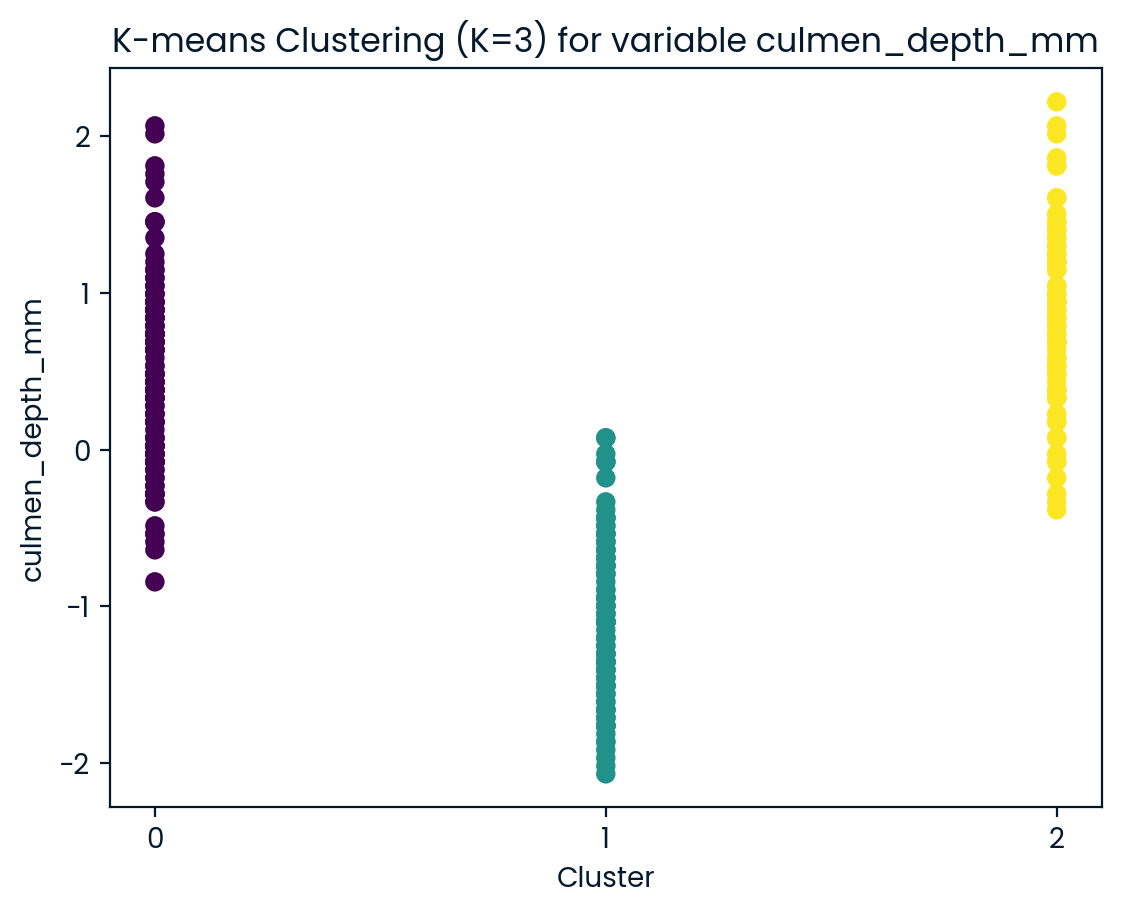

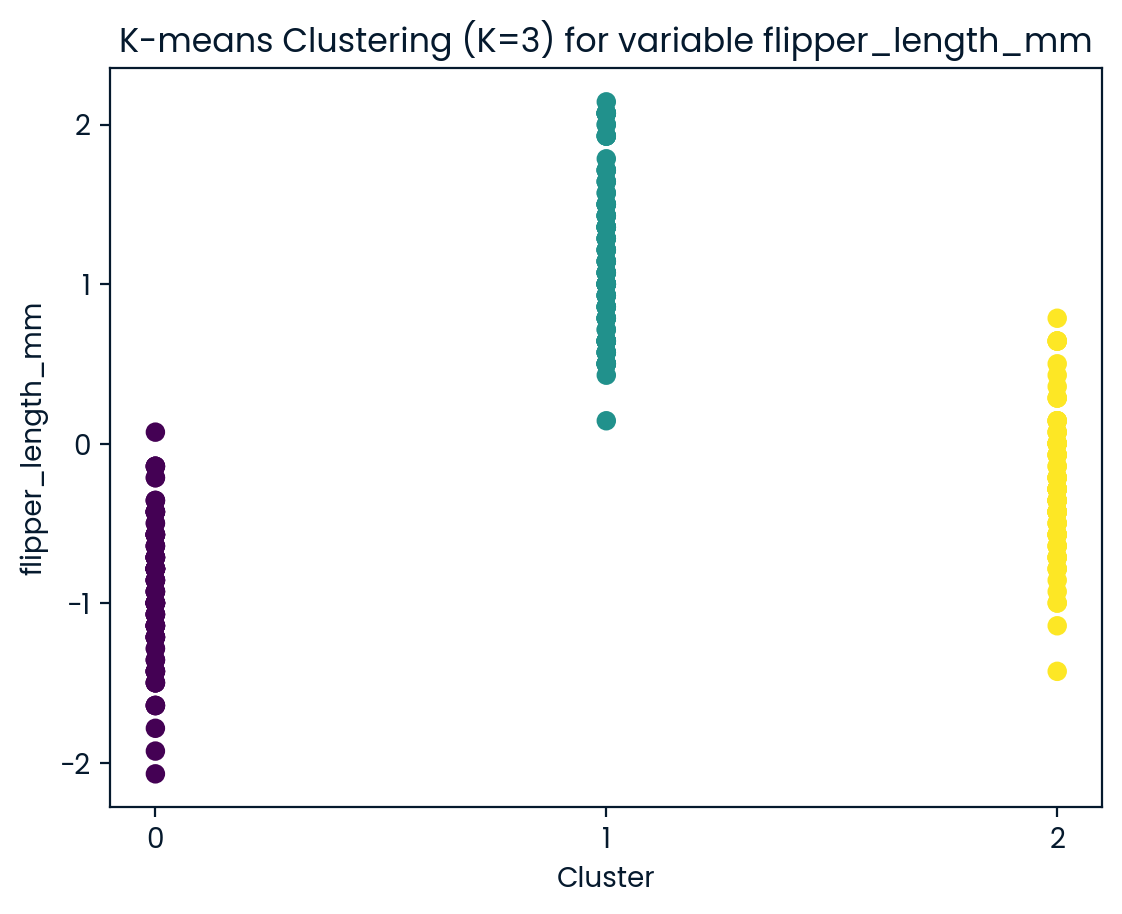

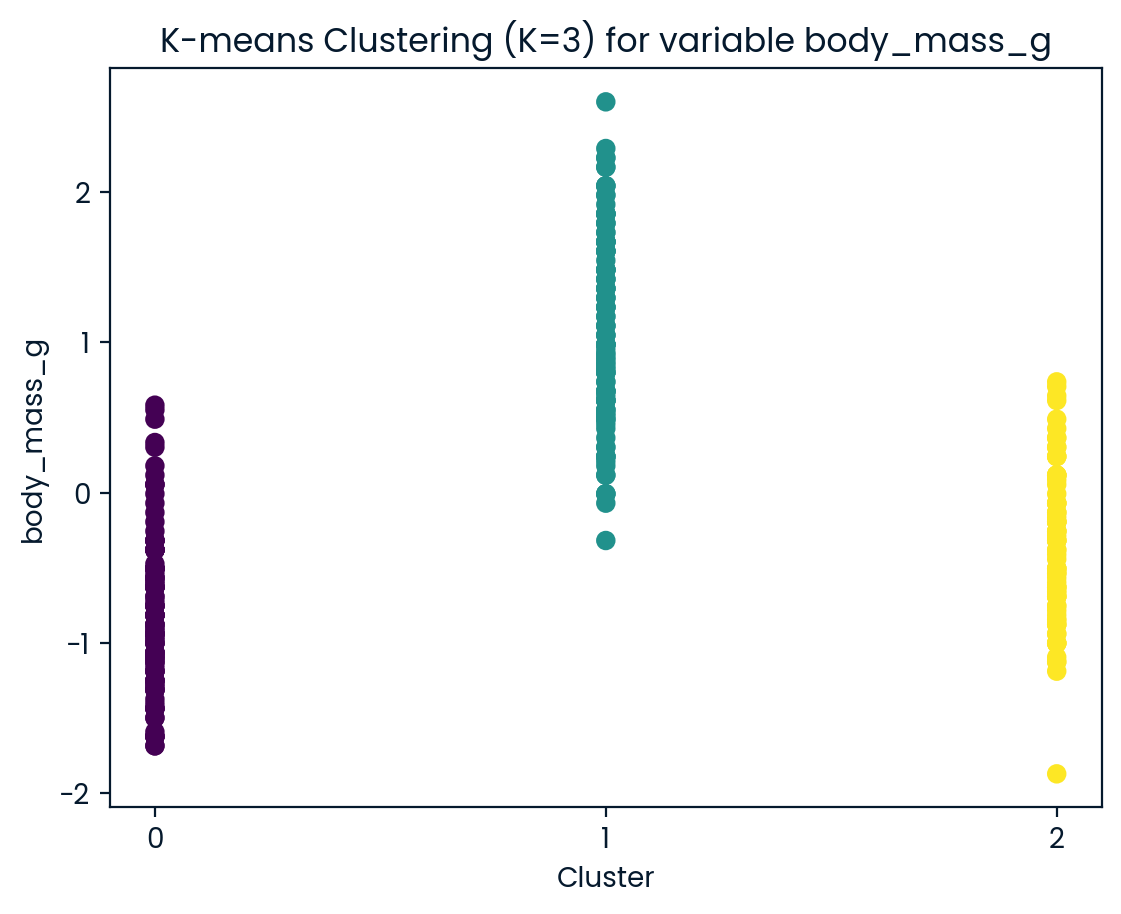

In [157]:
# visualize the clusters again (here for the 'culmen_length_mm' column)
for column in list_scaling:
    plt.scatter(penguins_df_2['cluster'], penguins_df_2[column], c=kmeans.labels_, cmap='viridis')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.xticks(range(int(penguins_df_2['cluster'].min()), int(penguins_df_2['cluster'].max()) + 1))
    plt.title(f'K-means Clustering (K={n_clusters}) for variable {column}')
    plt.show()

#### Step 4. Create a final statistical DataFrame for each cluster.

In [158]:
# first rescale the variables back to the origal scale
penguins_df_2[list_scaling] = scaler.inverse_transform(penguins_df_2[list_scaling])

In [159]:
# group by cluster and calculate the mean for each original variable
stat_penguins = penguins_df_2.groupby(['cluster'])[list_scaling].mean()

In [160]:
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
cluster,,,,
0,38.356693,18.066929,188.244094,3571.259843
1,47.568067,14.996639,217.235294,5092.436975
2,47.477907,18.787209,197.279070,3918.604651


#### Notes and guides
Some documentation and useful guides to look more into k-means clustering:
- https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html
- https://www.datacamp.com/tutorial/k-means-clustering-python
- https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
- https://medium.com/@zalarushirajsinh07/the-elbow-method-finding-the-optimal-number-of-clusters-d297f5aeb189
- https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/ 